Steps:
=====
1. EDA
2. Data Preparation / Preprocessing / Augmentation
4. Model Impementation & Training
5. Hyperparameter Tuning
6. Evaluation

Note:
-----
Due to the iterative nature of the process, it becomes difficult to encapsulate all the observtions and decisions made in each iteration and doing so would make this notebook unreadable. As a result, more often than not you will come across parts of the process that seemingly originated without any logic behind it, but in fact are part of the final result. I will try my best to add comments and try to explain such instances.

In [1]:
# Importing required modules
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.preprocessing import RobustScaler
from sklearn.neural_network import MLPRegressor
from sklearn import metrics

In [2]:
# Importing the datasets
df_training = pd.read_csv("./Data/Challenge 1 Training Dataset.csv")
df_predict = pd.read_csv('./Data/Challenge 1 Test Dataset.csv')

In [3]:
for df in df_training, df_predict:
    df['Status'] = np.where(df['Status'] == 'Developed', 1, 0)

Exploratory Data Analysis
=========================

In [4]:
for df in df_training, df_predict:
    print(df.shape)
    print(df.isna().sum())
    print('\n===============================\n')

(2572, 17)
Country                   0
Year                      0
Status                    0
Life expectancy          10
Adult Mortality          10
Health expenditure       43
GDP                     391
Schooling               143
Polio                    19
Hepatitis B             534
Measles                   0
Diphtheria               19
HIV/AIDS                  0
Alcohol                  16
Thinness  1-19 years     30
Thinness 5-9 years       30
BMI                      30
dtype: int64


(366, 16)
Country                   0
Year                      0
Status                    0
Adult Mortality           0
Health expenditure      183
GDP                      57
Schooling                20
Polio                     0
Hepatitis B              19
Measles                   0
Diphtheria                0
HIV/AIDS                  0
Alcohol                 178
Thinness  1-19 years      4
Thinness 5-9 years        4
BMI                       4
dtype: int64




Data Vizualization
------------------

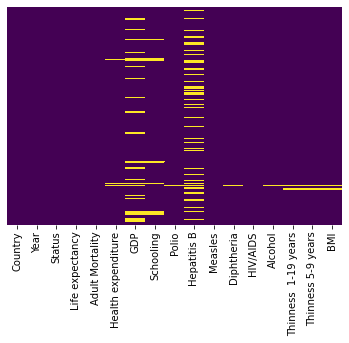

In [5]:
# Vizualizing mising values
sn.heatmap(df_training.isna(), cbar=False, yticklabels=False,cmap='viridis')

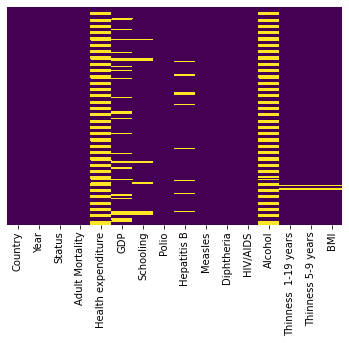

In [6]:
sn.heatmap(df_predict.isna(), cbar=False, yticklabels=False,cmap='viridis')

In [7]:
# Correlation Heatmap
df_training.corr().style.background_gradient(cmap='RdBu')

,Year,Status,Life expectancy,Adult Mortality,Health expenditure,GDP,Schooling,Polio,Hepatitis B,Measles,Diphtheria,HIV/AIDS,Alcohol,Thinness 1-19 years,Thinness 5-9 years,BMI
Year,1.000000,-0.002870,0.150344,-0.070057,0.090246,0.113666,0.194059,0.105799,0.114976,-0.085994,0.149855,-0.115861,-0.018715,-0.042567,-0.050512,0.092010
Status,-0.002870,1.000000,0.480780,-0.313031,0.300048,0.492661,0.512324,0.222497,0.114741,-0.076486,0.219462,-0.153059,0.607271,-0.368519,-0.365606,0.318907
Life expectancy,0.150344,0.480780,1.000000,-0.689150,0.210481,0.463765,0.742968,0.466295,0.237222,-0.162242,0.484090,-0.565656,0.406563,-0.477868,-0.470715,0.575067
Adult Mortality,-0.070057,-0.313031,-0.689150,1.000000,-0.111392,-0.293622,-0.441400,-0.263531,-0.148988,0.026749,-0.270445,0.530386,-0.194450,0.303085,0.307835,-0.389418
Health expenditure,0.090246,0.300048,0.210481,-0.111392,1.000000,0.143110,0.242109,0.135130,0.053158,-0.107307,0.148913,0.002600,0.299830,-0.279734,-0.284770,0.246830
GDP,0.113666,0.492661,0.463765,-0.293622,0.143110,1.000000,0.452251,0.216109,0.070264,-0.077083,0.205685,-0.139028,0.362586,-0.291162,-0.294921,0.308966
Schooling,0.194059,0.512324,0.742968,-0.441400,0.242109,0.452251,1.000000,0.425080,0.218564,-0.142229,0.432165,-0.213925,0.557082,-0.467968,-0.455731,0.548873
Polio,0.105799,0.222497,0.466295,-0.263531,0.135130,0.216109,0.425080,1.000000,0.462984,-0.145521,0.669815,-0.156202,0.227305,-0.231532,-0.231238,0.296494
Hepatitis B,0.114976,0.114741,0.237222,-0.148988,0.053158,0.070264,0.218564,0.462984,1.000000,-0.130649,0.565127,-0.107203,0.087665,-0.129811,-0.130276,0.150595
Measles,-0.085994,-0.076486,-0.162242,0.026749,-0.107307,-0.077083,-0.142229,-0.145521,-0.130649,1.000000,-0.150002,0.030906,-0.056380,0.217064,0.209827,-0.179307


Observations and Hunches:
-------------------------
1. Strong correlation between the 2 thinness columns
2. Alcohol values in df_predict are mostly alternating, and thus imputable
3. Weak corrrelation between Life expectancy and the following:
Year, Health expenditure, Hepatitis B, Measles
4. The country name should hve no bearing on the Life expectancy
5. There would be a positive correlation of Year with Life expectancy if it was done on a per country basis

Observations from looking at the database itself:
------------------------------------------------
1. BMI, GDP values seem unrealistic. But there still is correlation with Life expectancy and df_predict also has a similar distribution

In [8]:
# Summary of training set
df_training.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,2572.0,2006.525272,4.044355,2000.00000,2003.000000,2007.00000,2010.00000,2013.000
Status,2572.0,0.174184,0.379341,0.00000,0.000000,0.00000,0.00000,1.000
Life expectancy,2562.0,68.888954,9.636647,36.30000,62.800000,71.90000,75.40000,89.000
Adult Mortality,2562.0,166.799375,127.075898,1.00000,74.000000,144.00000,229.00000,723.000
Health expenditure,2529.0,5.918478,2.480002,0.37000,4.260000,5.73000,7.47000,17.600
GDP,2181.0,7324.213839,14081.016062,1.68135,445.893298,1658.31146,5693.52416,115761.577
Schooling,2429.0,11.862536,3.398904,0.00000,10.000000,12.20000,14.20000,20.700
Polio,2553.0,82.347043,23.541371,3.00000,77.000000,93.00000,97.00000,99.000
Hepatitis B,2038.0,80.629048,25.295578,1.00000,76.000000,92.00000,96.00000,99.000
Measles,2572.0,2526.679627,11845.827076,0.00000,0.000000,17.00000,396.25000,212183.000


/Users/malharpandya/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


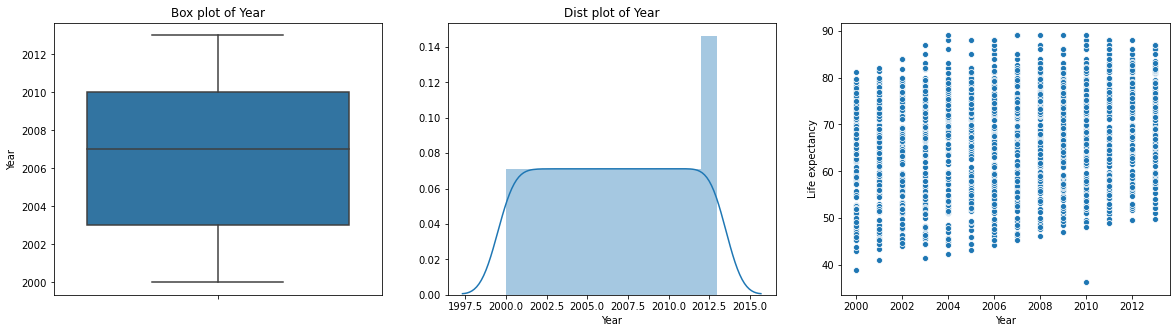

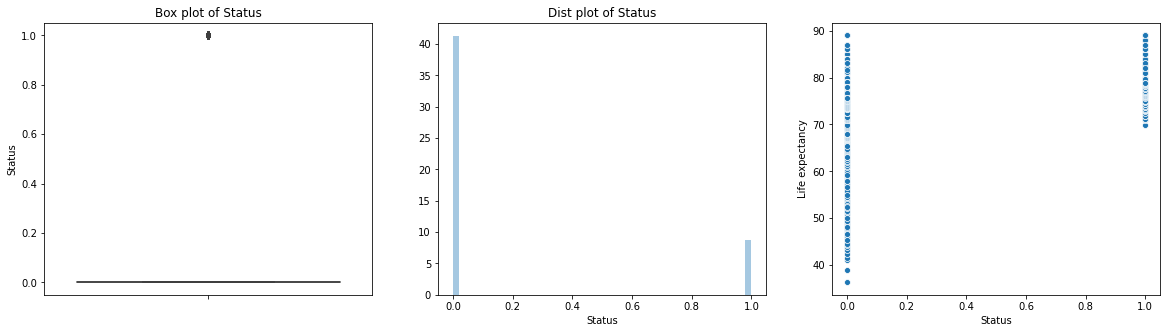

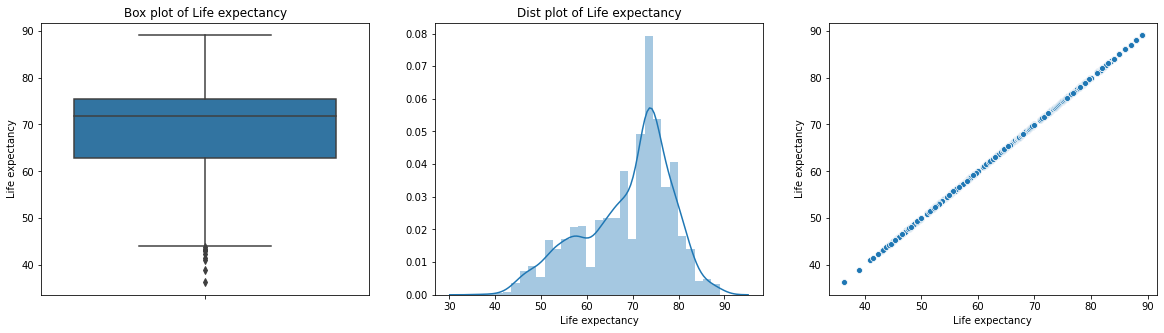

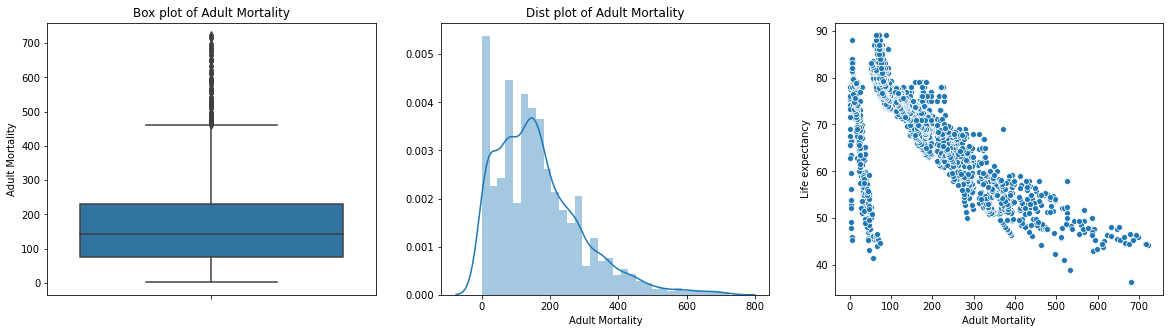

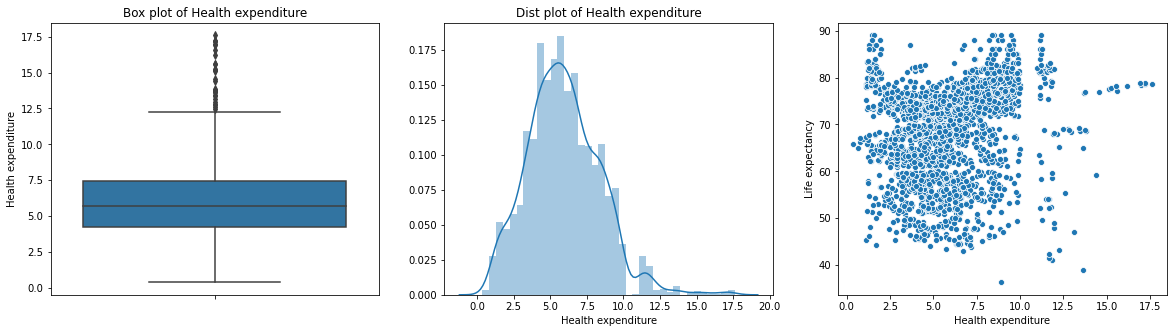

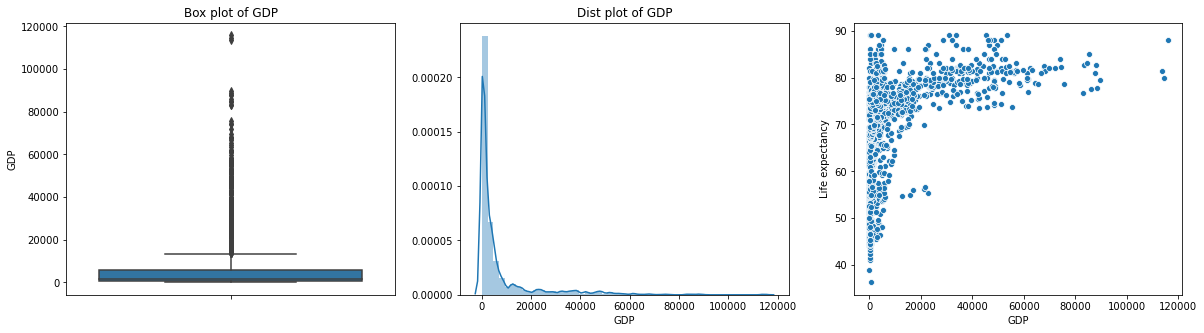

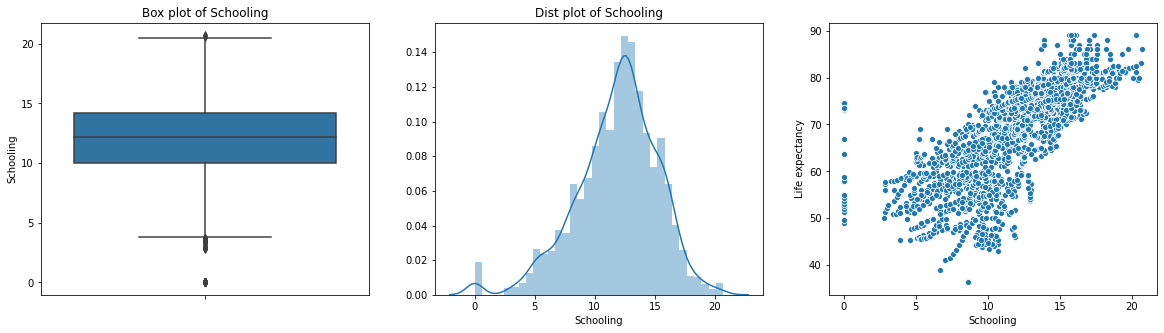

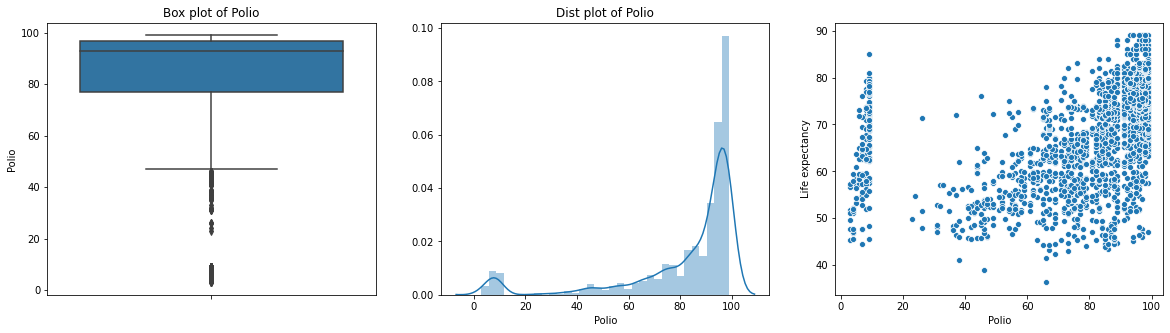

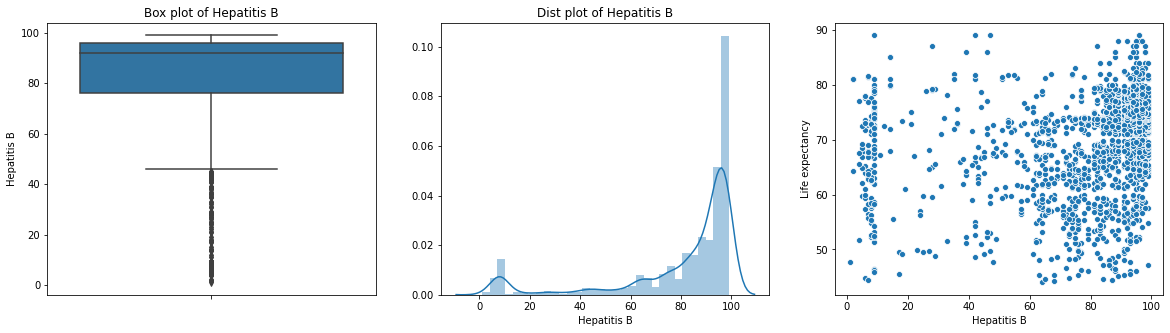

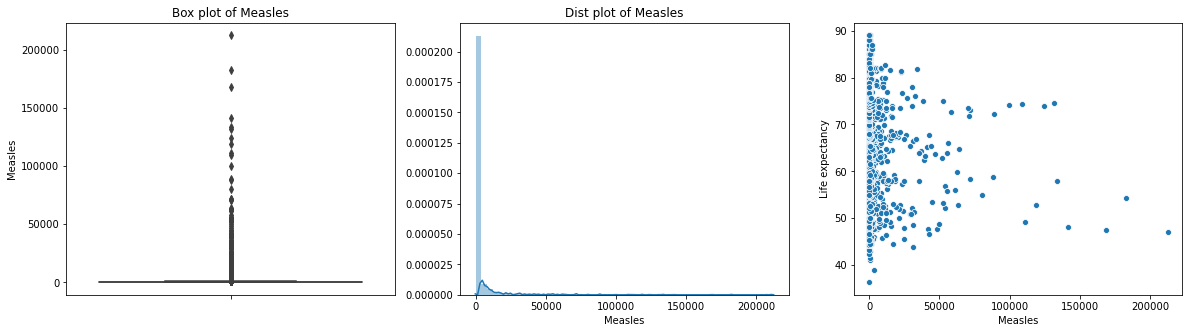

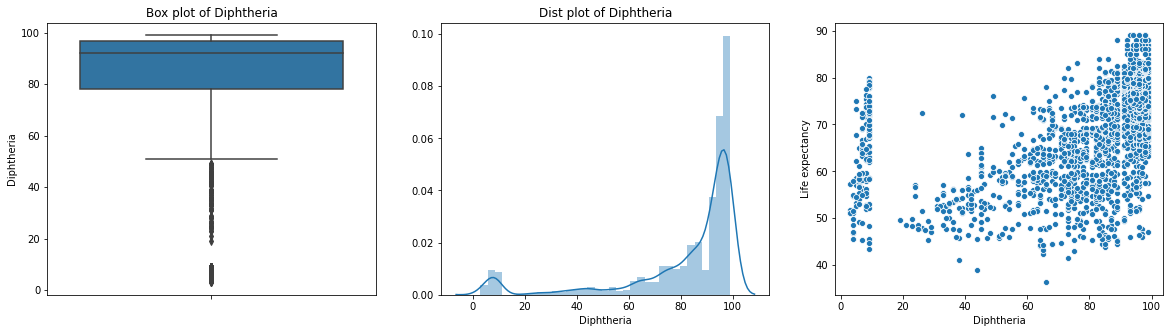

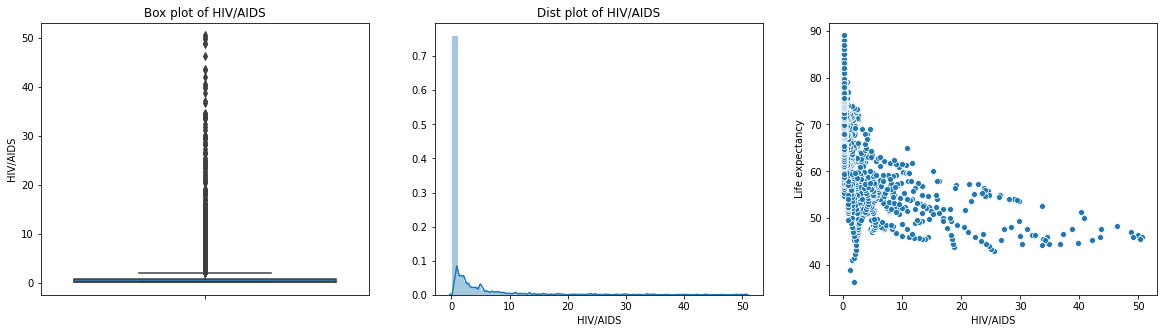

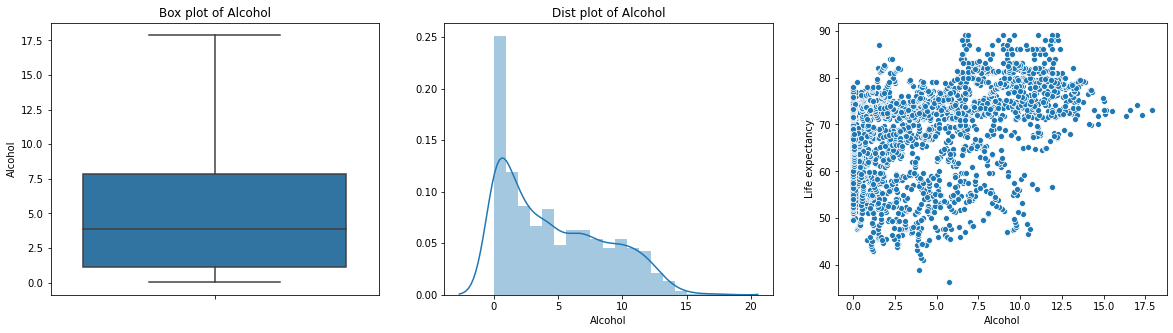

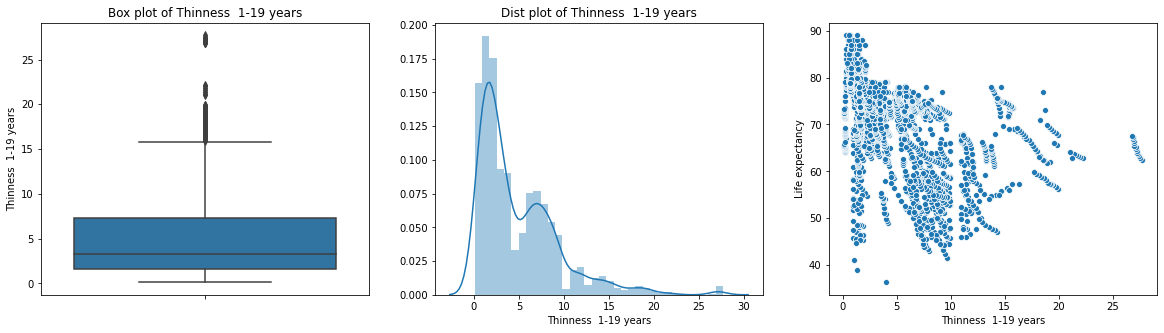

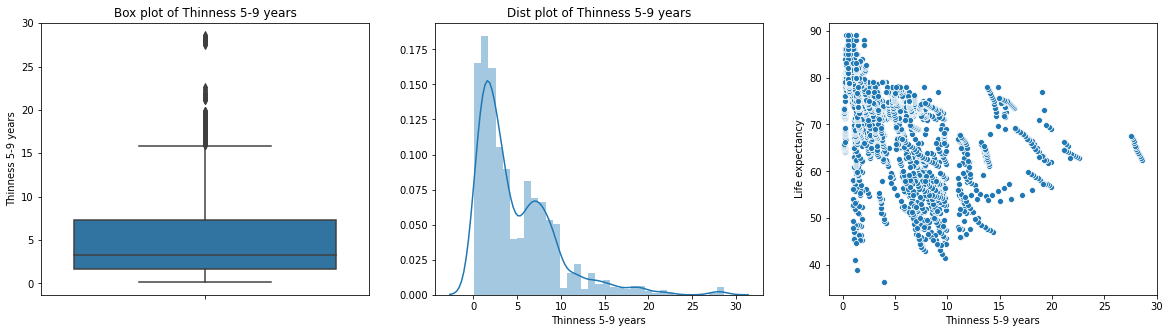

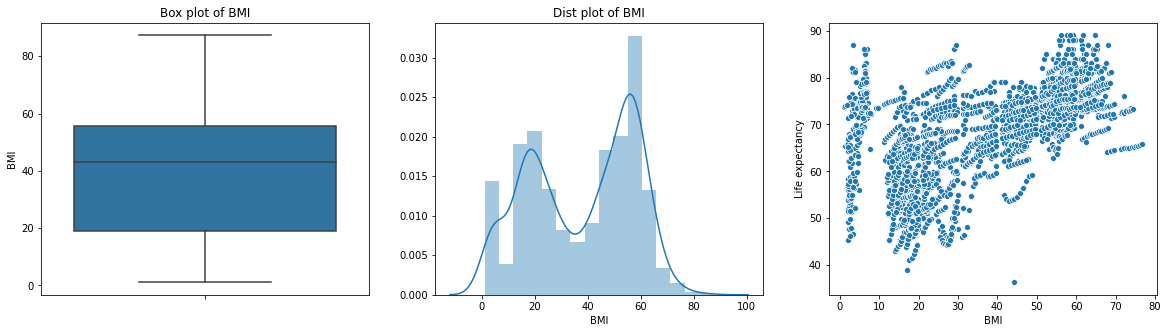

In [9]:
# Vizualizing Distribution
def plotchart(col):
    fix, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 5))
    sn.boxplot(col, orient='v',ax=ax1)
    ax1.set_ylabel = col.name
    ax1.set_title('Box plot of {}'.format(col.name))
    sn.distplot(col, ax=ax2)
    ax2.set_title('Dist plot of {}'.format(col.name))
    sn.scatterplot(y="Life expectancy", x=col, data=df_training)

for col in df_training.columns[1:]:
    plotchart(df_training[col])

Observations:
----------------
1. The hunch about Life expectancy increasing with time seems a reality
2. There is a big difference in the data availability for each status, which we will keep in mind in case imputation is done via mean or median
3. Adult mortality can be split into 2 distinct groups
4. Health expenditure is pretty random
5. GDP seems to follow logarithmic relationship
6. Schooling has a bunch of outlying 0 entries
7. Polio, Hepatitis B, and Diphtheria can be ssplit into <20, >20 parts
8. Measles entries are too common to be a viable feature
9. BMI, Year has an outlier, which upon further look is the (Haiti, 2010) entry

Data Preparation / Preprocessing / Augmentation
===============================================

Before we begin altering the datasets, we need to store required mean values for imputation of the datasets

In [10]:
mean_dict = {}

for col in ['GDP', 'Schooling', 'Alcohol', 'Thinness  1-19 years', 'BMI']:
    col_dict = {}
    if col == 'BMI':
        i = df_training[((df_training.Country == 'Haiti') & (df_training.Year == 2010))].index
        local_df = df_training.drop(i)
    else:
        local_df = df_training

    for category in 0, 1:
        col_arr = local_df[local_df['Status'] == category][col]

        if col == 'Schooling':
            col_arr = col_arr[col_arr != 0]
        col_dict[category] = col_arr.mean()

    mean_dict[col] = col_dict

In [11]:
# Based on the above observations, we filter the data as below
# Note: all decisions were evaluated on model MSE on the test set

# Removing rows
for col in ['Life expectancy', 'Polio', 'BMI']:
    df_training = df_training[df_training[col].notna()]
    
# Removing Outliers/Anomalies
df_training = df_training[df_training['Schooling'] != 0]

# Imputing GDP, Schooling, Thinness and BMI in prediction set
for col in ['GDP', 'Schooling', 'Thinness  1-19 years', 'BMI']:
    mean_ing = mean_dict[col][0]
    mean_ed = mean_dict[col][1]
    df_predict[col] = df_predict.apply(lambda row: row[col] if not np.isnan(row[col]) else (
        mean_ing if row['Status'] == 'Developing' else mean_ed), axis=1)

# Imputing Alcohol in prediction set
mean_ing = mean_dict['Alcohol'][0]
df_predict['Alcohol'].fillna(method='ffill', inplace=True)
df_predict.loc[df_predict['Country'] == 'South Sudan', ['Alcohol']] = mean_ing

# Finalized tranformations
df_training = df_training[df_training['Life expectancy'] >= 90 - df_training['Adult Mortality'] * 90 / 200]
for col in 'GDP', 'Schooling':
    df_training = df_training[df_training[col].notna()]
for col in 'Polio', 'Diphtheria':
    df_training.loc[(df_training[col] < 20), col] = df_training[col].mean()

for df in df_training, df_predict:

    # Log transform
    df['log_GDP'] = np.log(df['GDP'])

    # Finalizing Features
    for col in ['Country', 'Health expenditure', 'Hepatitis B', 'Measles', 'Thinness 5-9 years']:
        df.drop(col, axis=1, inplace=True)

df_training.reset_index(drop=True, inplace=True)

In [12]:
# Generating normalized training, testing and prediction set
# splitting according to year worked better than random split

X_train, X_test = df_training[df_training['Year'] <= 2012], df_training[df_training['Year'] > 2012]

for data in X_train, X_test:
    data.reset_index(drop=True, inplace=True)

y_train, y_test = X_train.pop('Life expectancy'), X_test.pop('Life expectancy')

# Feature Scaling
features = list(X_train.columns)
features.remove('Year')

scaler = RobustScaler() # Minmax and Standard was also tried

standardized_features_train = pd.DataFrame(scaler.fit_transform(X_train[features].copy()), columns = features)
X_train.drop(features, axis = 1, inplace = True)
X_train = pd.concat([X_train, standardized_features_train], axis= 1)


standardized_features_test = pd.DataFrame(scaler.fit_transform(X_test[features].copy()), columns = features)
X_test.drop(features, axis = 1, inplace = True)
X_test = pd.concat([X_test, standardized_features_test], axis= 1)

standardized_features_predict = pd.DataFrame(scaler.fit_transform(df_predict[features].copy()), columns = features)
df_predict.drop(features, axis = 1, inplace = True)
df_predict = pd.concat([df_predict, standardized_features_predict], axis= 1)

for data in X_train, X_test, df_predict:
    data['Year'] = (data['Year'] - 2000) / 100

/Users/malharpandya/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
/Users/malharpandya/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


Model Impementation & Training
==============================

In [13]:
# Other models were also tried, like LinearRegressor and OLS
model = MLPRegressor(hidden_layer_sizes = (100, 79, 21), learning_rate_init=0.005, random_state=69)
model.fit(X_train, y_train)

MLPRegressor(hidden_layer_sizes=(100, 79, 21), learning_rate_init=0.005,
             random_state=69)

Hyperparameter Tuning
=====================
Above hyperparameters occur as a result of 10^5 iterations and evaluation of MSE

Heres a few simple hyperparameter configurations yielding a 'local' minima

base mse: 7.678150146612169

state: 6.392467356326514, 81

layer: (5.870109140941315, 46) (5.390797858416906, (91, 95))

learning: 6.619496055464756, 36

Evaluation
==========

In [14]:
test = model.predict(X_test)
delta = np.subtract(test, y_test)
mse = np.square(delta).mean()
r2 = metrics.r2_score(y_test, test)
msle = metrics.mean_squared_log_error(y_test, test)
print('mse: ', mse)
print('avg delta: ', np.abs(delta).mean())
print('R2 Score: ', r2)
print('mean_squared_log_error: ', msle)

mse:  4.577480455618455
avg delta:  1.4529751280362755
R2 Score:  0.9372164777985151
mean_squared_log_error:  0.0009082699506995133


We have an accuracy of almost 94% and on average are guessing the Life expectncy within 1.5 years of the actual value

Generating CSV
==============

In [15]:
prediction = model.predict(df_predict)
pd.DataFrame(prediction).to_csv("predictions.csv")